In [6]:
from PIL import Image
import os
import numpy as np

In [7]:
path = '/mnt/SSD6/nathan/snow/data/training/synthetic'
files = [f for f in os.listdir(path) if f.endswith(".jpg")]
for i in range(10):
    image = Image.open(os.path.join(path, files[i]))
    print(type(image))
    print(image.size)
    array = np.asarray(image)
    print(array.shape)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 427)
(427, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(427, 640)
(640, 427, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 480)
(480, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 429)
(429, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 480)
(480, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 427)
(427, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 480)
(480, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 427)
(427, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 427)
(427, 640, 3)
<class 'PIL.JpegImagePlugin.JpegImageFile'>
(640, 428)
(428, 640, 3)


In [8]:
image = Image.open('/mnt/SSD6/nathan/snow/data/training/gt/sidewalk winter -grayscale -gray_05200.jpg')
array = np.asarray(image)
print(array.shape)

(640, 640, 3)


In [1]:
from PIL import Image
import os
import numpy as np
import torch
from configs import open_configs
from load_data import load_data
from format_data import format_data
from matplotlib import pyplot as plt
from time import time

/home/nathanw/miniconda3/envs/env1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_configs, training_configs, model_configs = open_configs()
print('configs oppened')
train_data  = load_data(data_configs)
print('data loaded')
train_data = torch.utils.data.ConcatDataset(train_data[0])
print('data concatenated')



configs oppened
50000
Loading 100 took 1.8990821838378906 seconds
16801
Loading 100 took 1.6574108600616455 seconds
16588
Loading 100 took 1.4246110916137695 seconds
16611
Loading 100 took 1.4852077960968018 seconds
data loaded
data concatenated


In [3]:
start = time()
for i in range(len(train_data)):
    # print(train_data[i][0].shape)
    # print(train_data[i][1].shape)
    syn, true = train_data[i]
    print(syn.shape)
    if syn.shape[1] == 0:
        print(i)
        print('error')
        break
    if syn.shape[2] == 0:
        print('error')
        break
    # print(data[i][0])
    # print(torch.max(data[i][0]))
    # print(torch.min(data[i][0]))
    # print(torch.max(data[i][1]))
    # print(torch.min(data[i][1]))
    # plt.imshow(data[i,0], interpolation='nearest')
    # plt.show()
end = time()
print(end - start)

image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
0
209088
0 64
0 64
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
1
209088
0 64
1 65
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
2
209088
0 64
2 66
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
3
209088
0 64
3 67
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
4
209088
0 64
4 68
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
5
209088
0 64
5 69
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shape 64
6
209088
0 64
6 70
torch.Size([3, 64, 64])
image shape torch.Size([3, 427, 640])
syn shape torch.Size([3, 427, 640])
data shap

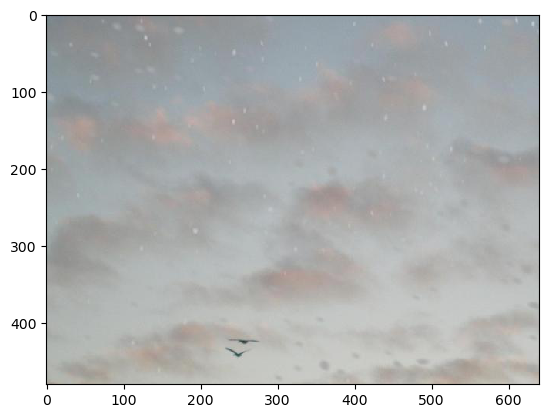

In [4]:
img = Image.open(os.path.join('/mnt/SSD6/nathan/snow/data/training/synthetic', os.listdir('/mnt/SSD6/nathan/snow/data/training/synthetic')[4]))
img = np.asarray(img)
plt.imshow(img, interpolation='nearest')
plt.show()

In [1]:
import torch

/home/nathanw/miniconda3/envs/env1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
l = []
l.append(torch.zeros(3,19,19))
l.append(torch.ones(3,19,19))
l[0][0] = 2
l[1][2] = -1


c = torch.cat([torch.unsqueeze(i,0) for i in l], dim=0)
print(c.shape)
c = torch.max(c, dim=0)
print(c[0].shape)
print(c)

torch.Size([2, 3, 19, 19])
torch.Size([3, 19, 19])
torch.return_types.max(
values=tensor([[[2., 2., 2.,  ..., 2., 2., 2.],
         [2., 2., 2.,  ..., 2., 2., 2.],
         [2., 2., 2.,  ..., 2., 2., 2.],
         ...,
         [2., 2., 2.,  ..., 2., 2., 2.],
         [2., 2., 2.,  ..., 2., 2., 2.],
         [2., 2., 2.,  ..., 2., 2., 2.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]),
indices=tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
    